<center>

# Flight Delay Predict

#### Data Science Bootcamp Capstone Project
#### Elia Abu-Manneh
##### April 12 2023

</center

## Part 2.1: Linear Regression Modelling

In [ ]:
# Imports

import os
import pandas as pd
import numpy as np
from skimage.io import imread
from tqdm import tqdm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential
from keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras import datasets, layers, models
from IPython.display import clear_output
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
import statsmodels.api as sm
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

np.random.seed(0)

%matplotlib inline
import seaborn as sns
import PIL
from PIL import Image
import seaborn as sb

In [165]:
ontime_10423 = pd.read_csv('../processed_data/ontime_10423.csv')
airlines_df = pd.read_csv('../processed_data/airlines.csv')
airports_df = pd.read_csv('../processed_data/airports.csv')

In [166]:
ontime_10423.describe()

,YTD,ORIGIN_AIRPORT_ID,DEP_DELAY,CANCELLED,OP_UNIQUE_CARRIER_9E,OP_UNIQUE_CARRIER_AA,OP_UNIQUE_CARRIER_AS,OP_UNIQUE_CARRIER_B6,OP_UNIQUE_CARRIER_DL,OP_UNIQUE_CARRIER_EV,...,DEST_AIRPORT_ID_14869,DEST_AIRPORT_ID_14893,DEST_AIRPORT_ID_14908,DEST_AIRPORT_ID_14986,DEST_AIRPORT_ID_15016,DEST_AIRPORT_ID_15304,DEST_AIRPORT_ID_15370,DEST_AIRPORT_ID_15412,DEST_AIRPORT_ID_15624,DEST_AIRPORT_ID_15919
count,244019.000000,244019.0,239207.000000,244019.000000,244019.000000,244019.000000,244019.000000,244019.000000,244019.000000,244019.000000,...,244019.000000,244019.000000,244019.000000,244019.000000,244019.000000,244019.000000,244019.000000,244019.000000,244019.000000,244019.000000
mean,198.873596,10423.0,12.095047,0.019990,0.004094,0.177011,0.028596,0.026387,0.120982,0.000127,...,0.019449,0.004336,0.004996,0.000463,0.013769,0.011983,0.002946,0.000824,0.000582,0.000332
std,107.056546,0.0,51.191644,0.139967,0.063853,0.381679,0.166669,0.160284,0.326107,0.011270,...,0.138098,0.065703,0.070502,0.021514,0.116533,0.108808,0.054202,0.028689,0.024116,0.018216
min,1.000000,10423.0,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,109.000000,10423.0,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,209.000000,10423.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,293.000000,10423.0,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,365.000000,10423.0,2109.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [167]:
#y1 = ontime_10423.iloc[:,-64:]
y1 = ontime_10423['DEP_DELAY'] #First Variable that we are trying to predict
y1.fillna(0, inplace=True)

y2 = ontime_10423['CANCELLED'] #Second Variable that we are trying to predict
y2.fillna(0, inplace=True)

X_data = ontime_10423.iloc[:,:-64]
X_data.drop(['ORIGIN_AIRPORT_ID','DEP_DELAY','CANCELLED'], axis=1, inplace=True)

In [168]:
X_data.shape

(244019, 43)

In [169]:
X_data.head(4)

,YTD,OP_UNIQUE_CARRIER_9E,OP_UNIQUE_CARRIER_AA,OP_UNIQUE_CARRIER_AS,OP_UNIQUE_CARRIER_B6,OP_UNIQUE_CARRIER_DL,OP_UNIQUE_CARRIER_EV,OP_UNIQUE_CARRIER_F9,OP_UNIQUE_CARRIER_G4,OP_UNIQUE_CARRIER_HA,...,DEST_AIRPORT_ID_11042,DEST_AIRPORT_ID_11057,DEST_AIRPORT_ID_11066,DEST_AIRPORT_ID_11193,DEST_AIRPORT_ID_11259,DEST_AIRPORT_ID_11278,DEST_AIRPORT_ID_11292,DEST_AIRPORT_ID_11298,DEST_AIRPORT_ID_11423,DEST_AIRPORT_ID_11433
0,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
y1.min()

-29.0

0.0


Text(0, 0.5, 'Frequency')

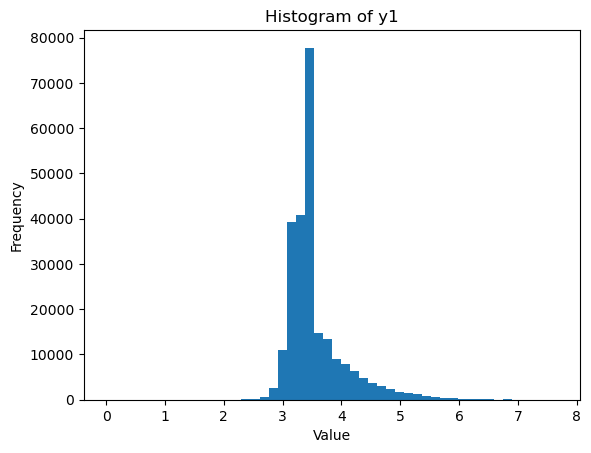

In [171]:
#log transformation of y1
y1 = y1 +29 + 1  #removing any values below 0 by offsetting
print(np.log(y1.min())) #checking for any -inf or negative numbers
#Applying the log transformation
y1 = np.log(y1)

plt.hist(y1, bins = 50)
plt.title('Histogram of y1')
plt.xlabel('Value')
plt.ylabel('Frequency')

In [172]:
# Scale numerical features 
def ytd_scaler(df):
    numerical_cols = ['YTD']
    scaler = MinMaxScaler()
    dfnum = scaler.fit_transform(df[numerical_cols])
    return dfnum

In [173]:
X_num = ytd_scaler(X_data)

In [174]:
X_data.drop(['YTD'], axis=1, inplace=True)

In [175]:
#Combining encoded categorical and scaled numerical features
X = np.concatenate((X_data, X_num), axis=1)

In [176]:
#Checking what the input data looks like
print((X[1]).shape)
print(X[0])

(43,)
[1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.
 0.00274725]


### Delay Linear Regression Model

In [177]:
#running a linear model

delay_model = sm.OLS(y1, X).fit() 
delay_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              DEP_DELAY   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     103.9
Date:                Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:23:37   Log-Likelihood:            -1.7532e+05
No. Observations:              244019   AIC:                         3.507e+05
Df Residuals:                  243976   BIC:                         3.512e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.4574      0.017    199.956      0.000       3.424       3.491
x2             3.5178      0.004    946.620      0.000       3.511       3.525
x3             3.4431      0.006    551.739      0.000       3.431       3.455
x4             3.6001      0.007    539.805      0.000       3.587       3.613
x5             3.4574      0.004    855.698      0.000       3.449       3.465
x6             3.5280      0.089     39.564      0.000       3.353       3.703
x7             3.6131      0.008    459.194      0.000       3.598       3.629
x8             3.6511      0.009    397.027      0.000       3.633       3.669
x9             3.9499      0.031    127.563      0.000       3.889       4.011
x10            3.5165      0.005    685.303      0.000       3.506       3.527
x11            3.5791      0.006    592.829      0.000       3.567       3.591
x12            3.5001      0.006    596.655      0.000       3.489       3.512
x13            3.4509      0.017    197.216      0.000       3.417       3.485
x14            3.5027      0.004    932.381      0.000       3.495       3.510
x15            3.6159      0.003   1336.873      0.000       3.611       3.621
x16            3.4789      0.010    357.299      0.000       3.460       3.498
x17            3.4085      0.009    382.539      0.000       3.391       3.426
x18            0.0111      0.012      0.890      0.374      -0.013       0.036
x19            0.0114      0.351      0.032      0.974      -0.677       0.699
x20            0.0602      0.028      2.124      0.034       0.005       0.116
x21            0.1631      0.045      3.616      0.000       0.075       0.251
x22           -0.0172      0.005     -3.323      0.001      -0.027      -0.007
x23            0.0073      0.033      0.221      0.825      -0.057       0.072
x24           -0.1405      0.248     -0.566      0.571      -0.627       0.346
x25           -0.0504      0.007     -7.447      0.000      -0.064      -0.037
x26            0.0502      0.029      1.713      0.087      -0.007       0.108
x27            0.0563      0.008      6.913      0.000       0.040       0.072
x28           -0.1033      0.496     -0.208      0.835      -1.076       0.870
x29            0.0329      0.019      1.706      0.088      -0.005       0.071
x30           -0.0453      0.008     -5.437      0.000      -0.062      -0.029
x31            0.1228      0.053      2.327      0.020       0.019       0.226
x32            0.0388      0.037      1.048      0.295      -0.034       0.111
x33            0.1806      0.059      3.040      0.002       0.064       0.297
x34           -0.0295      0.007     -4.178      0.000      -0.043      -0.016
x35           -0.1527      0.027     -5.592      0.000      -0.206      -0.099
x36            0.0108      0.013      0.823      0.411      -0.015       0.037
x3

In [208]:
#Creating a list of p-values
summary_table = delay_model.summary().tables[1].data[1:]
column_names = delay_model.summary().tables[1].data[0]
df_summary = pd.DataFrame(summary_table, columns=column_names)
df_summary = df_summary.astype({'coef': 'float', 'std err': 'float', 't': 'float', 'P>|t|': 'float'})
pval = df_summary['P>|t|']

### Assessing the Model

R^2 Value of 0.018 is too low meaning the model does not explain a sufficient amount of the variance

In [178]:
y_pred = delay_model.predict(X)
print(mean_squared_error(y1, y_pred))

y_pred = delay_model.predict(X)
print(mean_squared_error(y1, y_pred, squared=False))

0.2463658070770164
0.4963525028414951


An MSE of 0.247 minutes is very good relative to our predictive values for delay. However, this may indicate that the model is over fitting the data. 

In [179]:
#creating a list of variable names for graphical representation
X_data_list = X_data.columns.tolist()
X_data_list.append('YTD')

for i in range(len(X_data_list)):
    if X_data_list[i].startswith('OP_UNIQUE_CARRIER_'):

        carrier_code = X_data_list[i][len('OP_UNIQUE_CARRIER_'):]
        carrier_name = airlines_df.loc[airlines_df['OP_UNIQUE_CARRIER'] == carrier_code, 'CARRIER_NAME'].iloc[0]
        X_data_list[i] = carrier_name


    elif X_data_list[i].startswith('DEST'):
        
        dest_code = int(X_data_list[i][len('DEST_AIRPORT_ID_'):])
        dest_name = airports_df[airports_df['AIRPORT_ID']==dest_code].iloc[0,1]

        X_data_list[i] = dest_name
    else:
        pass

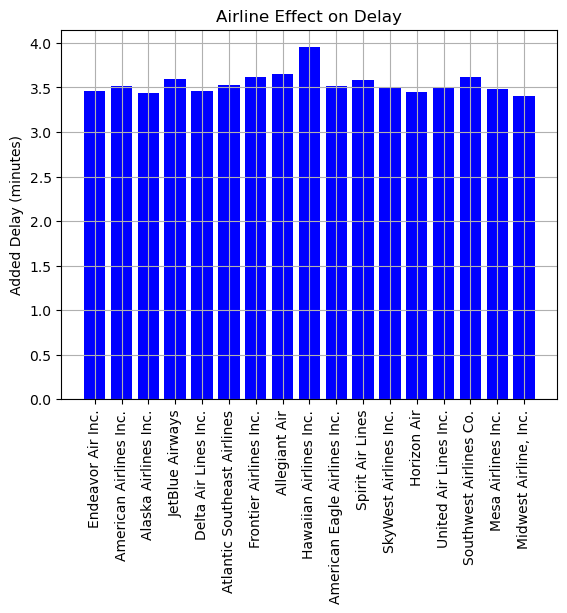

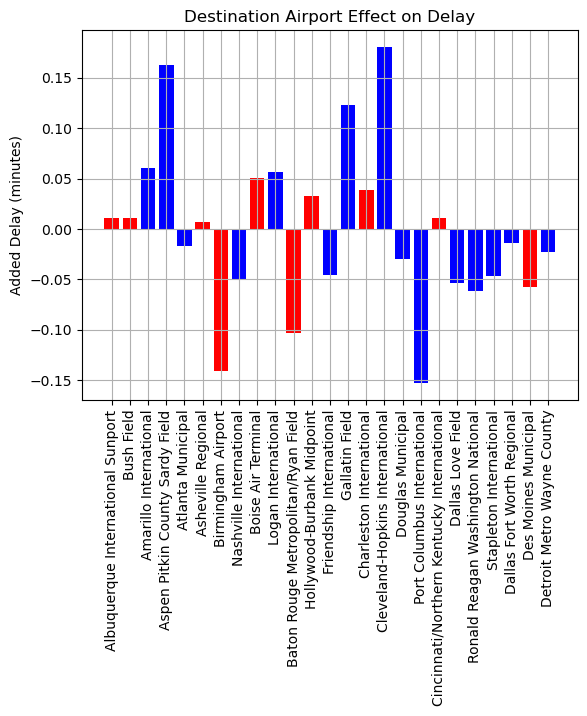

In [222]:
#visual representation of the coefficients and their effects on delay

params = delay_model.params
cols_1 = X_data_list[:17]
params_1 = params[:17]
pval_1 = delay_model.pvalues[:17]

#plotting the first chart
plt.bar(range(len(cols_1)), params_1, color=['r' if pv >= 0.05 else 'b' for pv in pval_1])
plt.xticks(range(len(cols_1)), cols_1, rotation=90)
plt.ylabel("Added Delay (minutes)")
plt.grid(True)
plt.title("Airline Effect on Delay")
plt.show()

cols_2 = X_data_list[17:-1]
params_2 = params[17:-1]
pval_2 = delay_model.pvalues[17:-1]

#plotting the second chart
plt.bar(range(len(cols_2)), params_2, color=['r' if pv >= 0.05 else 'b' for pv in pval_2])
plt.xticks(range(len(cols_2)), cols_2, rotation=90)
plt.ylabel("Added Delay (minutes)")
plt.grid(True)
plt.title("Destination Airport Effect on Delay")
plt.show()

Despite being very interpretable and has a low MSE score, this model fails to capture sufficient data variance and is likely over fitting the data.

### Delay XGBoost Model

XGBoost combines multiple decision trees that are weak learners, to create a stronger model.

Hyper-parameters for XGboost include: learning rate, number of trees, and maximum depth of the trees.

In [149]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

#defining the model
params = {
    'max_depth': 10,
    'learning_rate': 0.35,
    'objective': 'reg:squarederror'
}
model = xgb.train(params, dtrain)

In [150]:
#Model Evaluation
y_pred = model.predict(dtest)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print("RMSE:", rmse)
print("MAE:", mae)
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

MSE: 0.23872812887725925
RMSE: 0.48859812614996717
MAE: 0.31573706226178083
R-squared score: 0.03967474838662266


Despite a low MSE, RMSE and MAE, the R-squared score is too low. XGboost modelling is still not capable of capturing enough variance. This may be due to the amount of noise in the data and lack of predictibility. 

### Cancellation Linear Model

In [151]:
#running a linear model

cancellation_model = sm.OLS(y2, X).fit() 
cancellation_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CANCELLED   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     22.82
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          2.99e-173
Time:                        17:08:12   Log-Likelihood:             1.3406e+05
No. Observations:              244019   AIC:                        -2.680e+05
Df Residuals:                  243976   BIC:                        -2.676e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0228      0.005      4.691      0.000       0.013       0.032
x2             0.0300      0.001     28.689      0.000       0.028       0.032
x3             0.0277      0.002     15.772      0.000       0.024       0.031
x4             0.0283      0.002     15.068      0.000       0.025       0.032
x5             0.0177      0.001     15.540      0.000       0.015       0.020
x6             0.0078      0.025      0.312      0.755      -0.041       0.057
x7             0.0225      0.002     10.142      0.000       0.018       0.027
x8             0.0404      0.003     15.614      0.000       0.035       0.045
x9             0.0088      0.009      1.005      0.315      -0.008       0.026
x10            0.0257      0.001     17.787      0.000       0.023       0.029
x11            0.0345      0.002     20.281      0.000       0.031       0.038
x12            0.0222      0.002     13.440      0.000       0.019       0.025
x13            0.0478      0.005      9.712      0.000       0.038       0.057
x14            0.0218      0.001     20.636      0.000       0.020       0.024
x15            0.0301      0.001     39.601      0.000       0.029       0.032
x16            0.0260      0.003      9.492      0.000       0.021       0.031
x17            0.0348      0.003     13.870      0.000       0.030       0.040
x18           -0.0044      0.004     -1.250      0.211      -0.011       0.002
x19           -0.0215      0.099     -0.217      0.828      -0.215       0.172
x20           -0.0024      0.008     -0.303      0.762      -0.018       0.013
x21            0.0434      0.013      3.421      0.001       0.019       0.068
x22           -0.0022      0.001     -1.537      0.124      -0.005       0.001
x23            0.0350      0.009      3.768      0.000       0.017       0.053
x24           -0.0152      0.070     -0.218      0.827      -0.152       0.122
x25           -0.0049      0.002     -2.551      0.011      -0.009      -0.001
x26           -0.0015      0.008     -0.179      0.858      -0.018       0.015
x27           -0.0012      0.002     -0.543      0.587      -0.006       0.003
x28           -0.0112      0.140     -0.080      0.936      -0.285       0.263
x29           -0.0019      0.005     -0.351      0.726      -0.013       0.009
x30            0.0024      0.002      1.009      0.313      -0.002       0.007
x31            0.0385      0.015      2.591      0.010       0.009       0.068
x32           -0.0068      0.010     -0.648      0.517      -0.027       0.014
x33            0.0004      0.017      0.026      0.979      -0.032       0.033
x34           -0.0036      0.002     -1.808      0.071      -0.007       0.000
x35            0.0149      0.008      1.938      0.053      -0.000       0.030
x36           -0.0076      0.004     -2.064      0.039      -0.015      -0.000
x3

In [210]:
#Creating a list of p-values
summary_table =  cancellation_model.summary().tables[1].data[1:]
column_names = cancellation_model.summary().tables[1].data[0]
df_summary = pd.DataFrame(summary_table, columns=column_names)
df_summary = df_summary.astype({'coef': 'float', 'std err': 'float', 't': 'float', 'P>|t|': 'float'})
pval = df_summary['P>|t|']

### Assessing the Model

The R^2 Value of 0.004 is too low meaning the model does not explain a sufficient amount of the variance

In [153]:
y_pred = cancellation_model.predict(X)
print(mean_squared_error(y2, y_pred))

y_pred = cancellation_model.predict(X)
print(mean_squared_error(y2, y_pred, squared=False))

0.01951397038619551
0.1396924134883334


An MSE of 0.02 for a binary variable (0 no cancellation or 1 cancellation) is relatively small. This means the error between the predicted values and the correct values is small. 

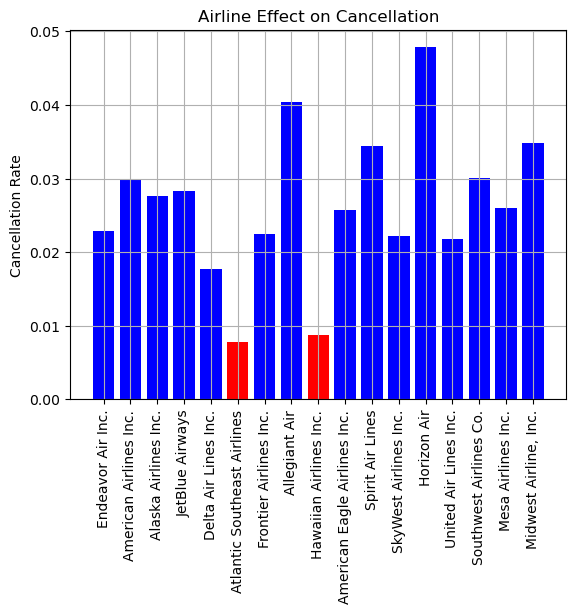

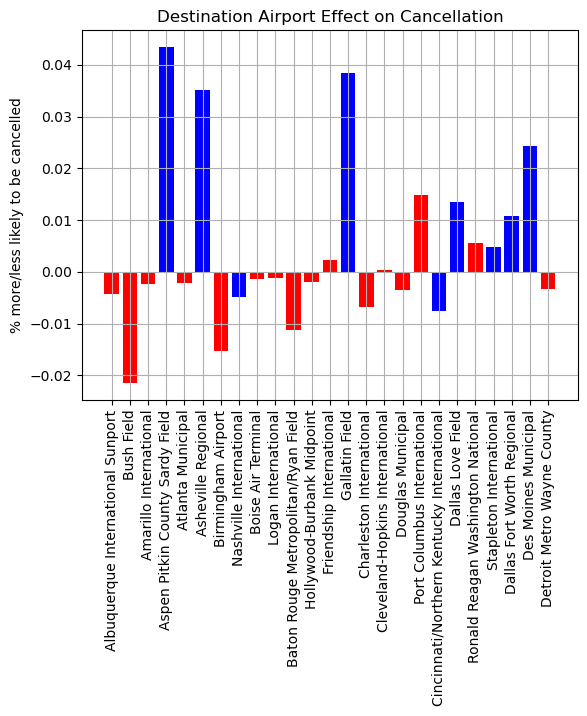

In [221]:
#visual representation of the coefficients and their effects on cancellation
params = cancellation_model.params
cols_1 = X_data_list[:17]
params_1 = params[:17]
pval_1 = cancellation_model.pvalues[:17]

# plotting the first chart
plt.bar(range(len(cols_1)), params_1, color=['r' if pv >= 0.05 else 'b' for pv in pval_1])
plt.xticks(range(len(cols_1)), cols_1, rotation=90)
plt.ylabel("Cancellation Rate")
plt.grid(True)
plt.title("Airline Effect on Cancellation")
plt.show()

cols_2 = X_data_list[17:-1]
params_2 = params[17:-1]
pval_2 = cancellation_model.pvalues[17:-1]

# plotting the second chart
plt.bar(range(len(cols_2)), params_2, color=['r' if pv >= 0.05 else 'b' for pv in pval_2])
plt.xticks(range(len(cols_2)), cols_2, rotation=90)
plt.ylabel("% more/less likely to be cancelled")
plt.grid(True)
plt.title("Destination Airport Effect on Cancellation")
plt.show()


### Cancellation XGBoost Model

In [162]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

#defining the model
params = {
    'max_depth': 10,
    'learning_rate': 0.25,
    'objective': 'reg:squarederror'
}
model = xgb.train(params, dtrain)

In [163]:
#Model Evaluation
y_pred = model.predict(dtest)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print("RMSE:", rmse)
print("MAE:", mae)
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

MSE: 0.01952583601650531
RMSE: 0.1397348775950561
MAE: 0.06267479096963952
R-squared score: 0.040277914554252225


Despite a low MSE, RMSE and MAE, the R-squared score is too low. XGboost modelling is still not capable of capturing enough variance in the mdata. This may be due to the amount of noise in the data and lack of predictibility. 

Seeing that linear models have not succeeded, we will try deploy neural networks to model this data. 